In [25]:
# 1 - Packages
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Choose a plotting style
plt.style.use('ggplot')  # or use 'seaborn-v0_8' if available

In [29]:
# 2.1 - Load the Data
file_path = "housing.csv"  # Make sure this file is in the same directory as your notebook
data = pd.read_csv(file_path)

# Separate features and target
X = data[['size', 'location_score', 'bedrooms']].values  # Features
y = data['price'].values  # Target variable

# Check shapes
print("Shape of features (X):", X.shape)
print("Shape of target (y):", y.shape)

Shape of features (X): (500, 3)
Shape of target (y): (500,)


In [33]:
# 2.2 - Split the Data
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize (standardize) the feature values
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Confirm the shapes
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (400, 3)
X_test shape: (100, 3)
y_train shape: (400,)
y_test shape: (100,)


In [41]:
#3 - Neural Network Design
# Define the model using Input layer
model = Sequential([
    Input(shape=(3,)),              # Instead of input_dim=3
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    loss='mean_squared_error',
    metrics=['mae']
)


Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 125434011648.0000 - mae: 349067.0312 - val_loss: 116658511872.0000 - val_mae: 338453.4062
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 125255245824.0000 - mae: 349287.6250 - val_loss: 116649476096.0000 - val_mae: 338440.0625
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 124148211712.0000 - mae: 347637.8750 - val_loss: 116625940480.0000 - val_mae: 338405.4062
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 127118557184.0000 - mae: 351510.9375 - val_loss: 116576501760.0000 - val_mae: 338332.8125
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 125117947904.0000 - mae: 348912.0625 - val_loss: 116483489792.0000 - val_mae: 338196.3750
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 124187942912.0000 - mae: 347370.0938 - val_loss: 116325851136.0000 - val_mae: 337965.6875
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 123147001856.0000 - mae: 346203.1562 - val_loss: 1160

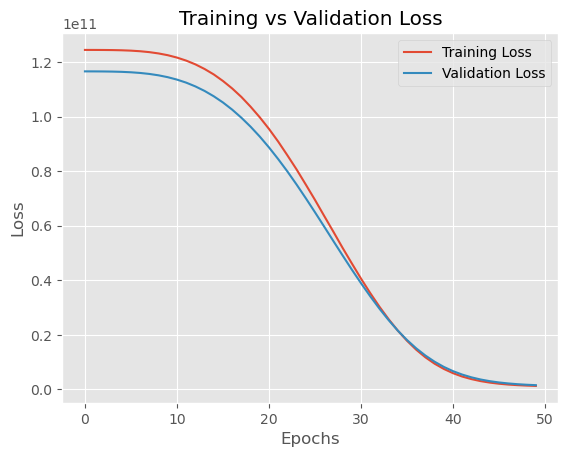

In [43]:
# Train the model
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=32
)

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')
plt.show()


In [45]:
# Evaluate the model on the test set
loss, mae = model.evaluate(X_test, y_test)

print(f"Test Loss: {loss}")
print(f"Test Mean Absolute Error (MAE): {mae}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1251984768.0000 - mae: 27745.7715 
Test Loss: 1242353280.0
Test Mean Absolute Error (MAE): 27912.810546875
